I start importing the libaries I will use for predicting future stocks.

In [0]:
#Load libraries

import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import numpy as np
import math

from sklearn.linear_model import LinearRegression, Lasso, LassoLars, BayesianRidge
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Loading apple stocks from yahoo finance, which I will use for predicting future stocks.

In [2]:
start =  datetime.datetime(2010,1,1)
end = datetime.datetime(2017,1,11)

df = web.DataReader("AAPL", "yahoo", start, end)[['Adj Close','Volume']]
df.head(4)

,Adj Close,Volume
Date,,
2010-01-04,26.681330,123432400.0
2010-01-05,26.727465,150476200.0
2010-01-06,26.302330,138040000.0
2010-01-07,26.253704,119282800.0


I only need 3 columns from the existing dataframe, so I choose Adj Close Volume and Date

Then we prepare our data. I choose that I want to use 1 % for predicting future stock prices with.

In [0]:
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

Now preparing X and y. I split X up in 2 parts. I use "X lately" for predicting future stocks with and "X" is used for training the model with.Y is the label that we wanna predict. I chose the closing stock price, which is called "Adj Close"  

In [0]:
X = preprocessing.scale(np.array(df))
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df['Adj Close'])
y = y[:-forecast_out]

Using the train_test_split which split up the data in X and Y train and test. Test is 20% and training is 80%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now I train the models that I want to use for prediciting future stock prices. I chose LinearRegression, Lasso and BayesionRidge as my models, which I train with my training and test data.

In [6]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

#Lasso
cllas = Lasso(alpha=0.1)
cllas.fit(X_train, y_train)

#BayesianRidge
clbridge = BayesianRidge()
clbridge.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

Now that the models is train, I want to try predict future stock prices for APPL based on the latest X.

In [0]:
forecast_set_clfreg = clfreg.predict(X_lately)
forecast_set_cllas = cllas.predict(X_lately)
forecast_set_clbridge = clbridge.predict(X_lately)

df['Forecast'] = np.nan

Now I want to plot my stock prices predictions for my 3 models. I made this function which takes day after the latest stock and the set with predicted stock prices. For every future data where I made a prediction for I add another row to my dataframe. When I added all my predictions to my dataframe, then I run plot where I show the relation between the date and the predicted price. I also show stock prices already known.

In [0]:
def addPredictToDf(day, setOfPredictions):
  next_date = day
  for i in setOfPredictions:
    next_unit = next_date
    next_date += datetime.timedelta(days=1)
    df.loc[next_unit] = [np.nan for c in df.columns if c != 'Forecast']+[i]
  df['Adj Close'].tail(500).plot()
  df['Forecast'].tail(500).plot()
  plt.legend(loc=4)
  plt.xlabel('Date')
  plt.ylabel('Price')

This is a plot that shows the predicted stocks based on the Linear regression.

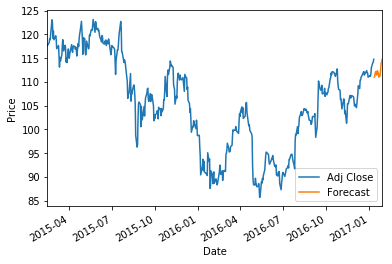

In [10]:
next_day = df.iloc[-1].name + datetime.timedelta(days=1)    
addPredictToDf(next_day, forecast_set_clfreg)

This is a plot that shows the predicted stocks based on the Lasso regression.


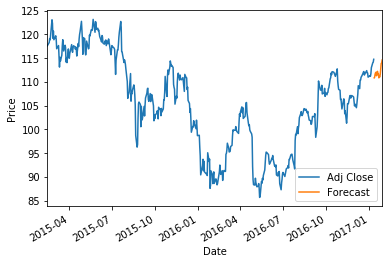

In [11]:
addPredictToDf(next_day, forecast_set_cllas)

This is a plot that shows the predicted stocks based on the Bayesian Ridge.


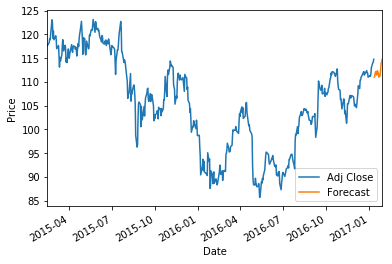

In [12]:
addPredictToDf(next_day, forecast_set_clbridge)